# EDA


The first dataset(taxi) includes taxi company name and the number of rides for each company from November 15-16th,2017.

The second dataset(rides) includes neighborhoods in Chicago where rides ended and and the average number of rides that ended in each neighborhood in November 2017.

In [15]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [16]:
taxi = pd.read_csv('https://code.s3.yandex.net/datasets/project_sql_result_01.csv')
rides = pd.read_csv('https://code.s3.yandex.net/datasets/project_sql_result_04.csv')

In [17]:
print(taxi.info())
print(taxi.describe())
print(rides.info())
print(rides.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None
       trips_amount
count     64.000000
mean    2145.484375
std     3812.310186
min        2.000000
25%       20.750000
50%      178.500000
75%     2106.500000
max    19558.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None
       average_trips
count      94.000000
mean      599.953728
std      1714.591098
min         1.800000
25%        14.266667
50

In [18]:
print(taxi.isna().sum())
print(rides.isna().sum())


company_name    0
trips_amount    0
dtype: int64
dropoff_location_name    0
average_trips            0
dtype: int64


According to our isna function there are no null values in either of the Taxi or Rides datasets.

# Data Visualization

<AxesSubplot:xlabel='company_name'>

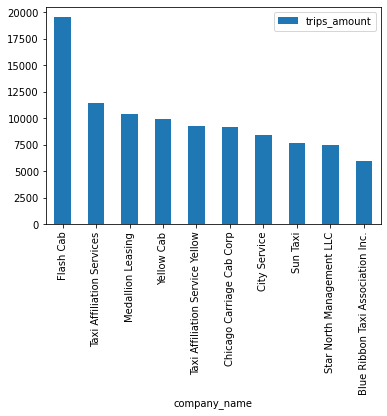

In [48]:
pickups = taxi.nlargest(10,"trips_amount")
pickups.plot(kind='bar', y= "trips_amount", x ="company_name")

For November 15-16, 2017, we see that Flash Cab has the most pickups with just under 20,000. On the other side of the graph the Blue Ribbon Taxi has the 10th highest amount of pickups with just under 7500.


<AxesSubplot:xlabel='dropoff_location_name'>

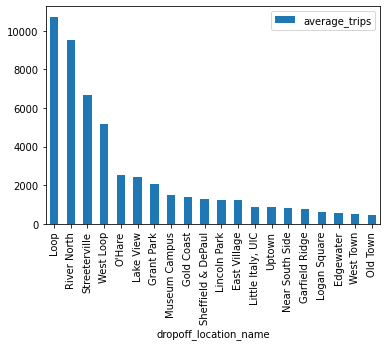

In [53]:
dropoffs = rides.nlargest(20,"average_trips")
dropoffs.plot(kind='bar', y= "average_trips", x ="dropoff_location_name")

Here we see that the Loop edges out the other nieghborhoods in dropoffs with just over 10,000. River North is a close second right below 10,000.


In [50]:
airport_ride = pd.read_csv('/datasets/project_sql_result_07.csv')

In [51]:
airport_ride.info()
airport_ride.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


In [52]:
airport_ride["start_ts"] = pd.to_datetime(airport_ride["start_ts"])
airport_ride.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


# Hypothesis Testing

The hypothesis that we will be testing is...

'The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.'


In [54]:
rain = airport_ride[(airport_ride["start_ts"].dt.weekday==5)&(airport_ride["weather_conditions"]!="Good")]["duration_seconds"].values

In [55]:
no_rain = airport_ride[(airport_ride["start_ts"].dt.weekday==5)&(airport_ride["weather_conditions"]=="Good")]["duration_seconds"].values


In [56]:
alpha = 0.05
test = stats.ttest_ind(rain, no_rain)
print('p value:', test.pvalue)

if (test.pvalue < alpha):
    print("The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.")
else:
    print("The average duration of rides from the Loop to O'Hare International Airport does not change on rainy Saturdays.")

p value: 6.517970327099473e-12
The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.


# Conclusion

First we imported in the Taxi and Rides datasets. We checked to see if there were any null values in either of the datasets and there weren't. Since the datasets were clean we started to plot graphs. We checked to see the top 10 Taxi companies and then we checked to see the top 20 neighborhoods in which people were dropped off. 

The top taxi company was the Flash Cab and the top neighborhoods for dropoffs was the Loop.

We tested the hypothesis that the average duration of rides from the Loop to OHare Airport and if it changes on rainy saturdays.

We feel confident in denying the null hypothesis and stating that the average duration of rides DO change during rainy saturdays.
